In [19]:
import time

import av
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import os
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from datasets import EchoNetDataset
from models import EchoNetRegressor

In [20]:
root_dir = '/Users/aaronliu/Data/EchoNet-Dynamic/Videos/'

In [21]:
filelist = pd.read_csv('/Users/aaronliu/Data/EchoNet-Dynamic/FileList.csv')
tracing = pd.read_csv('/Users/aaronliu/Data/EchoNet-Dynamic/VolumeTracings.csv')

In [22]:
valid_clips = tracing.FileName.str.replace('.avi', '').unique()
valid_idx = np.isin(filelist.FileName, valid_clips)

<ipython-input-22-f544ae10fea0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  valid_clips = tracing.FileName.str.replace('.avi', '').unique()


In [23]:
valid_filelist = filelist[valid_idx]

4


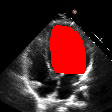

22


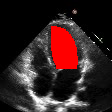

In [29]:
filename = valid_filelist[valid_filelist.Split=='TRAIN'].FileName.iloc[2929] + '.avi'
grouped_df = tracing[tracing.FileName == filename].groupby('Frame')
keys = tracing[tracing.FileName == filename].Frame.unique()
# for key, item in grouped_df:
#     print(grouped_df.get_group(key), "\n\n")
filepath = os.path.join(root_dir, filename)
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
container = av.open(filepath)
k = 0
for j, frame in enumerate(container.decode(video=0)):        
    if j in keys:
        print(j)
        coordinates = grouped_df.get_group(j)[['X1', 'Y1', 'X2', 'Y2']].values.tolist()[1:]
        f = frame.to_image()
        draw = ImageDraw.Draw(f)
        for c in coordinates:
            draw.rectangle(c, 'red')
        display(f)